In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

In [3]:
datas = pd.read_csv("/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/pre_processing_data/data_eda.csv")
X = datas[datas.columns[:-1]]
Y = datas['Target'].values

In [4]:
label_mapping = {
    "Dropout":0,
    "Graduate":1,
    "Enrolled":1
}

Y = [label_mapping[i] for i in Y]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=50)

In [6]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
y_train = np.array(y_train)
X_scaled = X.to_numpy()
X_scaled = X_scaled.reshape(X_scaled.shape[0],X_scaled.shape[1],1)
Y_scaled = np.array(Y)

In [10]:
model = Sequential()
model.add(LSTM(64,activation='leaky_relu',input_shape=(X_scaled.shape[1],X_scaled.shape[2]),return_sequences=True))
#model.add(Dense(32, activation='relu'))
model.add(LSTM(32,activation='leaky_relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model.fit(X_scaled,Y_scaled,validation_split=0.33,epochs=200,verbose=2)


Epoch 1/200
60/60 - 7s - loss: 0.6783 - accuracy: 0.7057 - val_loss: 0.7538 - val_accuracy: 0.0000e+00 - 7s/epoch - 123ms/step
Epoch 2/200
60/60 - 2s - loss: 0.6533 - accuracy: 0.7068 - val_loss: 0.8434 - val_accuracy: 0.0000e+00 - 2s/epoch - 27ms/step
Epoch 3/200
60/60 - 4s - loss: 0.6209 - accuracy: 0.7068 - val_loss: 1.0148 - val_accuracy: 0.0000e+00 - 4s/epoch - 59ms/step
Epoch 4/200
60/60 - 2s - loss: 0.5977 - accuracy: 0.7068 - val_loss: 1.2079 - val_accuracy: 0.0000e+00 - 2s/epoch - 27ms/step
Epoch 5/200
60/60 - 3s - loss: 0.5977 - accuracy: 0.7068 - val_loss: 1.1883 - val_accuracy: 0.0000e+00 - 3s/epoch - 52ms/step
Epoch 6/200
60/60 - 2s - loss: 0.5960 - accuracy: 0.7068 - val_loss: 1.1873 - val_accuracy: 0.0000e+00 - 2s/epoch - 33ms/step
Epoch 7/200
60/60 - 2s - loss: 0.5927 - accuracy: 0.7068 - val_loss: 1.2421 - val_accuracy: 0.0000e+00 - 2s/epoch - 40ms/step
Epoch 8/200
60/60 - 3s - loss: 0.5909 - accuracy: 0.7068 - val_loss: 1.2535 - val_accuracy: 0.0000e+00 - 3s/epoch - 4

In [10]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_accuracy = history.history["val_accuracy"]

In [ ]:
def plot_valid_train(train,valid,title,label_x,label_y,show=True,multi=None):
    epoch=len(train)
    if multi:
        multi.plot(range(1,epoch+1),train,label="Train",color='b')
        multi.plot(range(1,epoch+1),valid,label="Validation",color='g')
        multi.set_title(title)
        multi.set_xlabel(label_x)
        multi.set_ylabel(label_y)
        multi.grid()
        multi.legend()
    else:
        plt.plot(range(1,epoch+1),train,label="Train",color='b')
        plt.plot(range(1,epoch+1),valid,label="Validation",color='g')
        plt.title(title)
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.grid()
        plt.legend()
    if show:
        plt.show()

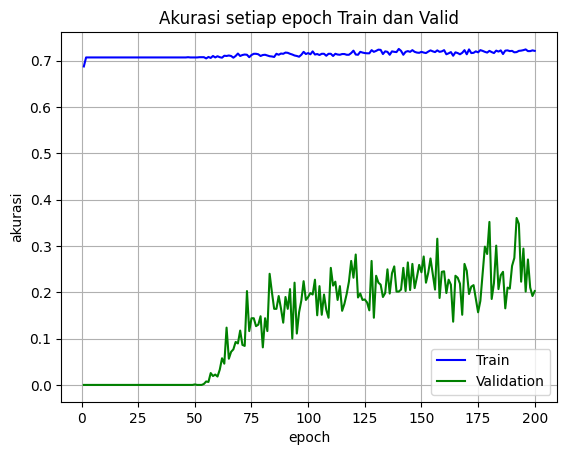

In [15]:
plot_valid_train(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

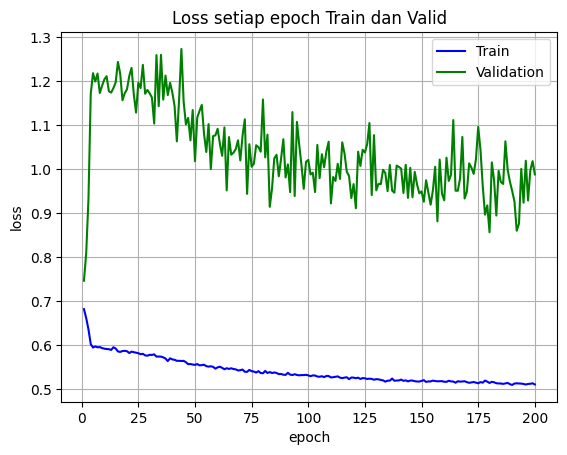

In [16]:
#plot loss
plot_valid_train(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [17]:
from sklearn.model_selection import StratifiedKFold
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X_scaled,Y_scaled):
    train_x, test_x = X_scaled[index_train],X_scaled[index_test]
    train_y, test_y = Y_scaled[index_train], Y_scaled[index_test]


    model.fit(train_x,train_y,epochs=200,verbose=0)
    scores = model.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))

Validation accuracy: 74.69%
Validation accuracy: 76.23%
Validation accuracy: 80.28%
Validation accuracy: 79.58%
Validation accuracy: 76.58%


In [18]:
model.save("LTSM_Model.h5")

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
#fungsi model
def iterasi_learningrate_RMSprop(model,step,start,end,down=False):
    histo = []

    lr = start
    if down:
        while lr >= end:
            model.compile(
            loss='binary_crossentropy',
            optimizer=RMSprop(learning_rate=lr),
            metrics=['accuracy']
            )
            history = model.fit(X_scaled,Y_scaled,validation_split=0.33,epochs=200,verbose=2)
            histo.append(history)
            lr += step
    else:
        while lr <= end:
            model.compile(
            loss='binary_crossentropy',
            optimizer=RMSprop(learning_rate=lr),
            metrics=['accuracy']
            )
            history = model.fit(X_scaled,Y_scaled,validation_split=0.33,epochs=200,verbose=2)
            histo.append(history)
            lr += step
    
    return histo

def iterasi_learningrate_crossvalidation_RMSprop(x,y,num_fold,model,start,step,end,down=False):
    skf = StratifiedKFold(n_splits=num_fold, shuffle=True,random_state=22)
    akurasi = {}
    
    lr = start
    if down:
        while lr >= end:
            total_akurasi = 0
            for index_train, index_test in skf.split(x,y):
                train_x, test_x = x[index_train],x[index_test]
                train_y, test_y = y[index_train], y[index_test]

                model.compile(
                loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=lr),
                metrics=['accuracy']
                )
                print(f"akursi learning_rate: {lr}")
                model.fit(train_x,train_y,epochs=200,verbose=0)
                scores = model.evaluate(test_x,test_y, verbose=0)
                total_akurasi += scores[1]

                print("Validation accuracy: {:.2f}%".format(scores[1] * 100))
        
            akurasi[lr]=total_akurasi/num_fold
            lr += step
    else:

        while lr <= end:
            total_akurasi = 0
            for index_train, index_test in skf.split(x,y):
                train_x, test_x = x[index_train],x[index_test]
                train_y, test_y = y[index_train], y[index_test]

                model.compile(
                loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=lr),
                metrics=['accuracy']
                )
                print(f"akursi learning_rate: {lr}")
                model.fit(train_x,train_y,epochs=200,verbose=0)
                scores = model.evaluate(test_x,test_y, verbose=0)
                total_akurasi += scores[1]

                print("Validation accuracy: {:.2f}%".format(scores[1] * 100))
        
            akurasi[lr]=total_akurasi/num_fold
            lr += step
    
    return akurasi

In [16]:
histori_akurasi = iterasi_learningrate_RMSprop(model,0.01,0.001,0.051)

Epoch 1/200
60/60 - 49s - loss: 0.5586 - accuracy: 0.6910 - val_loss: 0.8810 - val_accuracy: 0.2484 - 49s/epoch - 816ms/step
Epoch 2/200
60/60 - 2s - loss: 0.5373 - accuracy: 0.7084 - val_loss: 1.2556 - val_accuracy: 0.0736 - 2s/epoch - 34ms/step
Epoch 3/200
60/60 - 2s - loss: 0.5264 - accuracy: 0.7157 - val_loss: 1.6163 - val_accuracy: 0.0288 - 2s/epoch - 35ms/step
Epoch 4/200
60/60 - 1s - loss: 0.5291 - accuracy: 0.7225 - val_loss: 1.1185 - val_accuracy: 0.1215 - 1s/epoch - 23ms/step
Epoch 5/200
60/60 - 1s - loss: 0.5283 - accuracy: 0.7194 - val_loss: 0.9677 - val_accuracy: 0.1162 - 1s/epoch - 21ms/step
Epoch 6/200
60/60 - 1s - loss: 0.5210 - accuracy: 0.7115 - val_loss: 0.9518 - val_accuracy: 0.0576 - 1s/epoch - 21ms/step
Epoch 7/200
60/60 - 1s - loss: 0.5286 - accuracy: 0.7231 - val_loss: 0.6496 - val_accuracy: 0.8166 - 1s/epoch - 21ms/step
Epoch 8/200
60/60 - 1s - loss: 0.5210 - accuracy: 0.7152 - val_loss: 1.5506 - val_accuracy: 0.1215 - 1s/epoch - 21ms/step
Epoch 9/200
60/60 - 1

In [17]:
histori_akurasi

In [20]:
akurasi_validasi = iterasi_learningrate_crossvalidation_RMSprop(X_scaled,Y_scaled,5,model,0.001,0.01,0.051)

akursi learning_rate: 0.001
Validation accuracy: 47.63%
akursi learning_rate: 0.001
Validation accuracy: 53.35%
akursi learning_rate: 0.001
Validation accuracy: 62.50%
akursi learning_rate: 0.001
Validation accuracy: 61.27%
akursi learning_rate: 0.001
Validation accuracy: 50.70%
akursi learning_rate: 0.011
Validation accuracy: 48.68%
akursi learning_rate: 0.011
Validation accuracy: 55.28%
akursi learning_rate: 0.011
Validation accuracy: 58.10%
akursi learning_rate: 0.011
Validation accuracy: 56.51%
akursi learning_rate: 0.011
Validation accuracy: 52.99%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 60.28%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 67.08%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 52.11%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 71.13%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 60.21%
akursi learning_rate: 0.031
Validation accuracy: 68.19%
akursi learning_rate: 0.031
V

In [21]:
akurasi_validasi

{0.001: 0.5508886396884918,
 0.011: 0.5431384444236755,
 0.020999999999999998: 0.6216187119483948,
 0.031: 0.5310979187488556,
 0.041: 0.5329098641872406}

In [22]:
def multiplot(data,title,value,start,step):
    
    num_kolom = 1
    num_rows = len(data)
    

    fig,axes = plt.subplots(num_rows, 1, figsize=(30, 20))
    row = num_rows
    for i, histori in enumerate(data):
        row -= 1
        plot_valid_train(histori.history[value],histori.history[f"val_{value}"],f"lr = {start}","epoch",value,False,axes[i])
        start += step
        #axes[row,col].set_title(kolom)
    
    fig.suptitle( title)


    plt.tight_layout()
    plt.show()

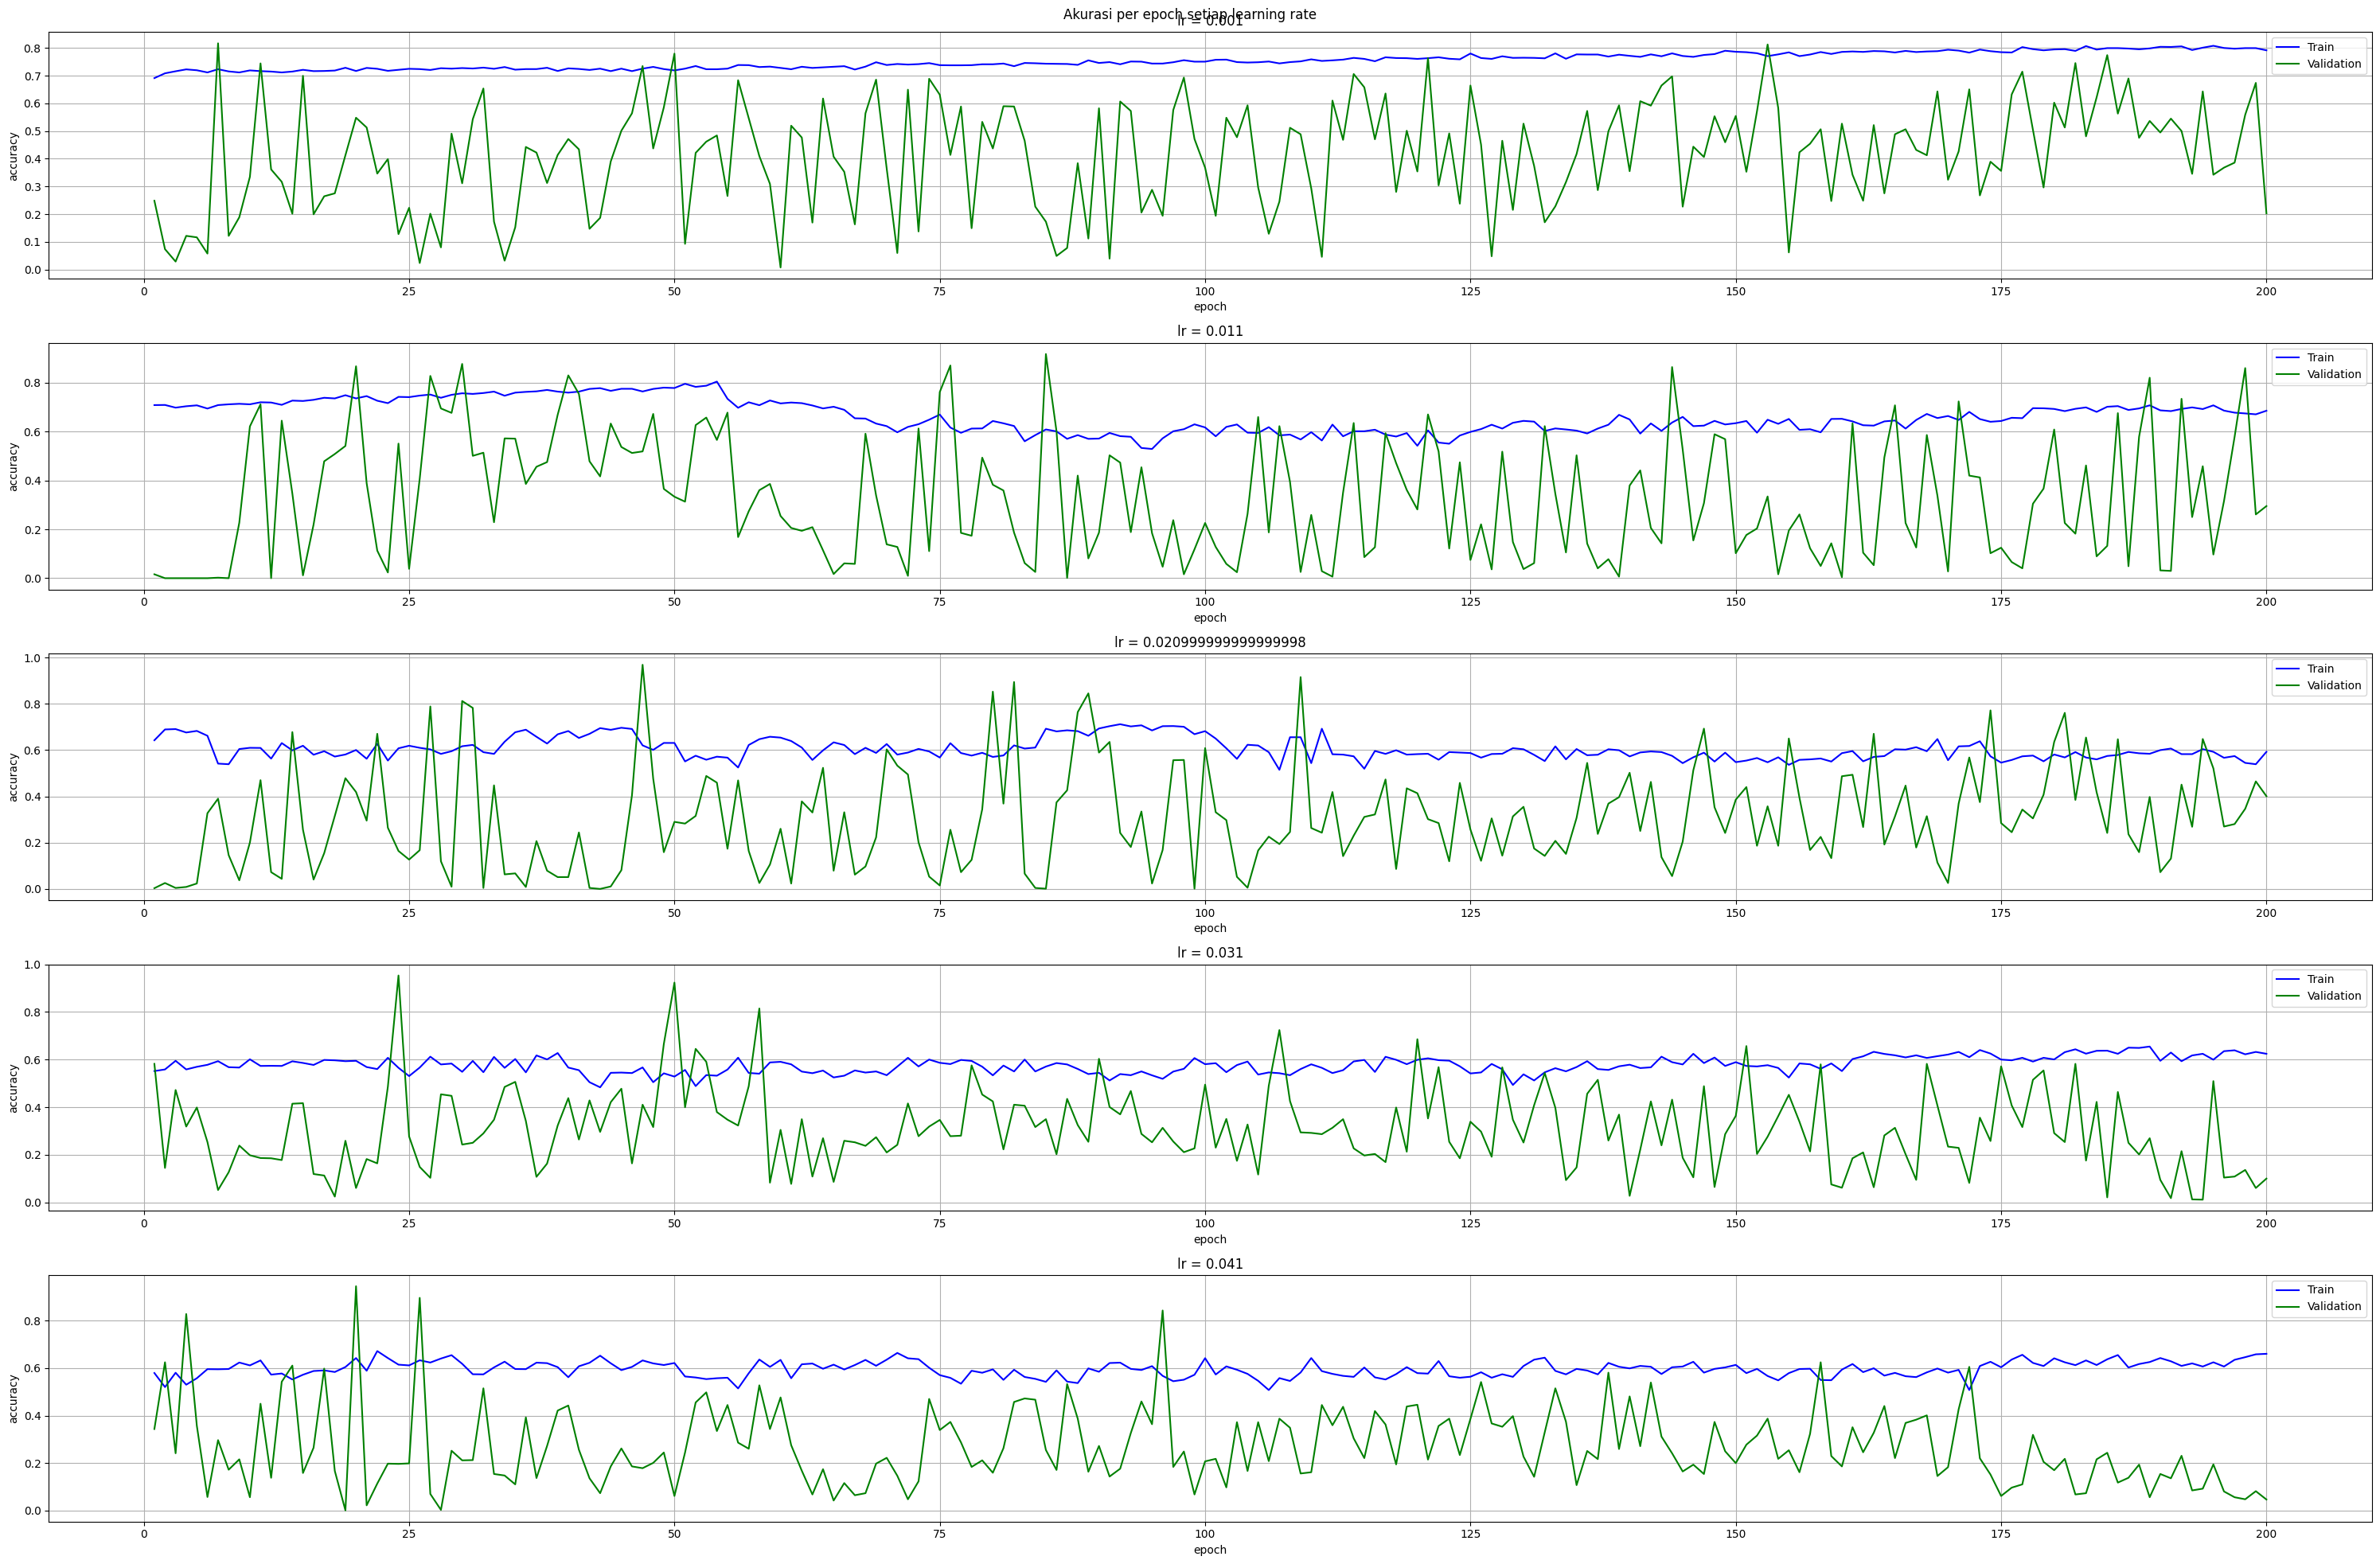

In [23]:
#plot akurasi per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","accuracy",0.001,0.01)

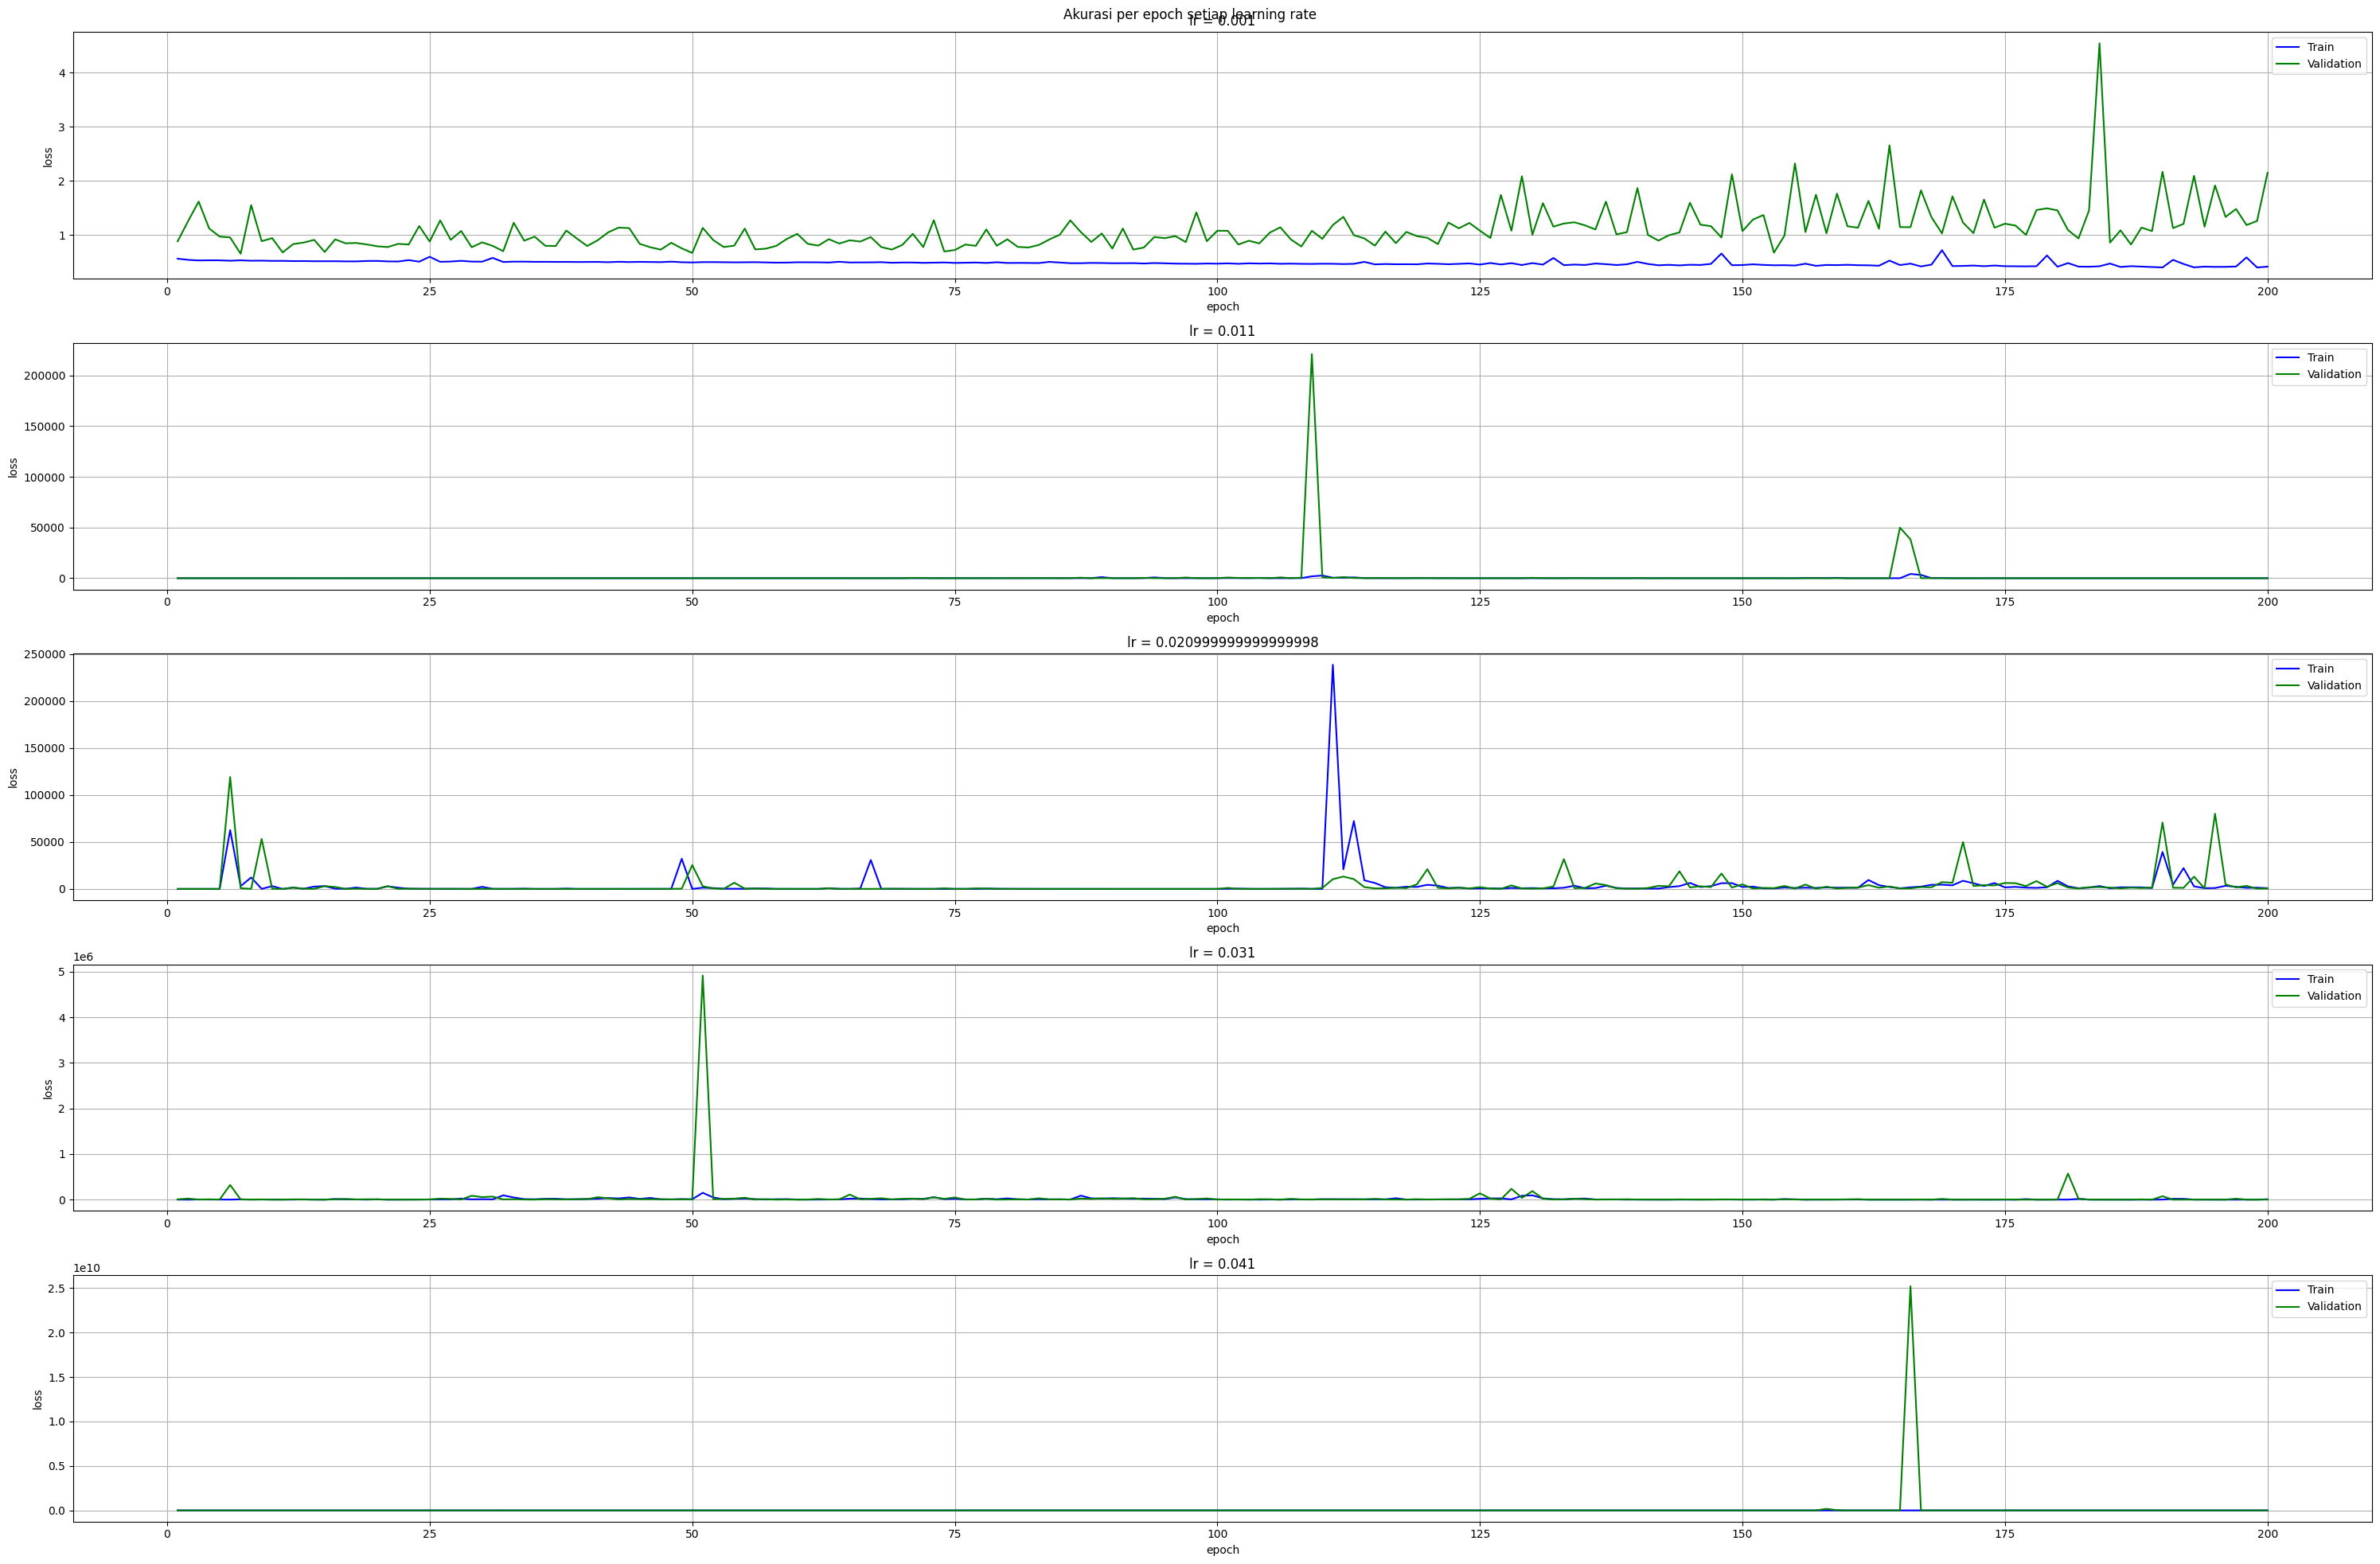

In [24]:
#plot loss per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","loss",0.001,0.01)

In [25]:
histori_akurasi_ = iterasi_learningrate_RMSprop(model,-0.0001,0.001,0.0005,True)

Epoch 1/200
60/60 - 5s - loss: 191778.7812 - accuracy: 0.3994 - val_loss: 199.8353 - val_accuracy: 0.9190 - 5s/epoch - 90ms/step
Epoch 2/200
60/60 - 1s - loss: 5200.2280 - accuracy: 0.4036 - val_loss: 711.1144 - val_accuracy: 0.9190 - 1s/epoch - 24ms/step
Epoch 3/200
60/60 - 2s - loss: 149199.8281 - accuracy: 0.4046 - val_loss: 84.3469 - val_accuracy: 0.9179 - 2s/epoch - 28ms/step
Epoch 4/200
60/60 - 2s - loss: 1419.6895 - accuracy: 0.4204 - val_loss: 503.4778 - val_accuracy: 0.9147 - 2s/epoch - 30ms/step
Epoch 5/200
60/60 - 1s - loss: 64.6651 - accuracy: 0.4120 - val_loss: 48.9692 - val_accuracy: 0.9158 - 1s/epoch - 24ms/step
Epoch 6/200
60/60 - 2s - loss: 12545.9424 - accuracy: 0.4015 - val_loss: 6130.3950 - val_accuracy: 0.9179 - 2s/epoch - 28ms/step
Epoch 7/200
60/60 - 2s - loss: 6323.0215 - accuracy: 0.4004 - val_loss: 257.8762 - val_accuracy: 0.9030 - 2s/epoch - 29ms/step
Epoch 8/200
60/60 - 1s - loss: 47273.9336 - accuracy: 0.4115 - val_loss: 37.6334 - val_accuracy: 0.8849 - 1s/

In [26]:
akurasi_validasi_ = iterasi_learningrate_crossvalidation_RMSprop(X_scaled,Y_scaled,5,model,0.001,-0.0001,0.0005,True)

akursi learning_rate: 0.001
Validation accuracy: 70.65%
akursi learning_rate: 0.001
Validation accuracy: 72.36%
akursi learning_rate: 0.001
Validation accuracy: 73.59%
akursi learning_rate: 0.001
Validation accuracy: 73.77%
akursi learning_rate: 0.001
Validation accuracy: 73.42%
akursi learning_rate: 0.0009
Validation accuracy: 72.93%
akursi learning_rate: 0.0009
Validation accuracy: 74.82%
akursi learning_rate: 0.0009
Validation accuracy: 74.82%
akursi learning_rate: 0.0009
Validation accuracy: 76.94%
akursi learning_rate: 0.0009
Validation accuracy: 74.12%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 74.69%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 73.06%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 72.71%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 77.29%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 74.47%
akursi learning_rate: 0.0006999999999999999
Validation accuracy: 75.04%
aku

In [27]:
akurasi_validasi_

{0.001: 0.7275681376457215,
 0.0009: 0.7472784042358398,
 0.0007999999999999999: 0.7444553017616272,
 0.0006999999999999999: 0.7490315318107605,
 0.0005999999999999998: 0.7539592504501342}

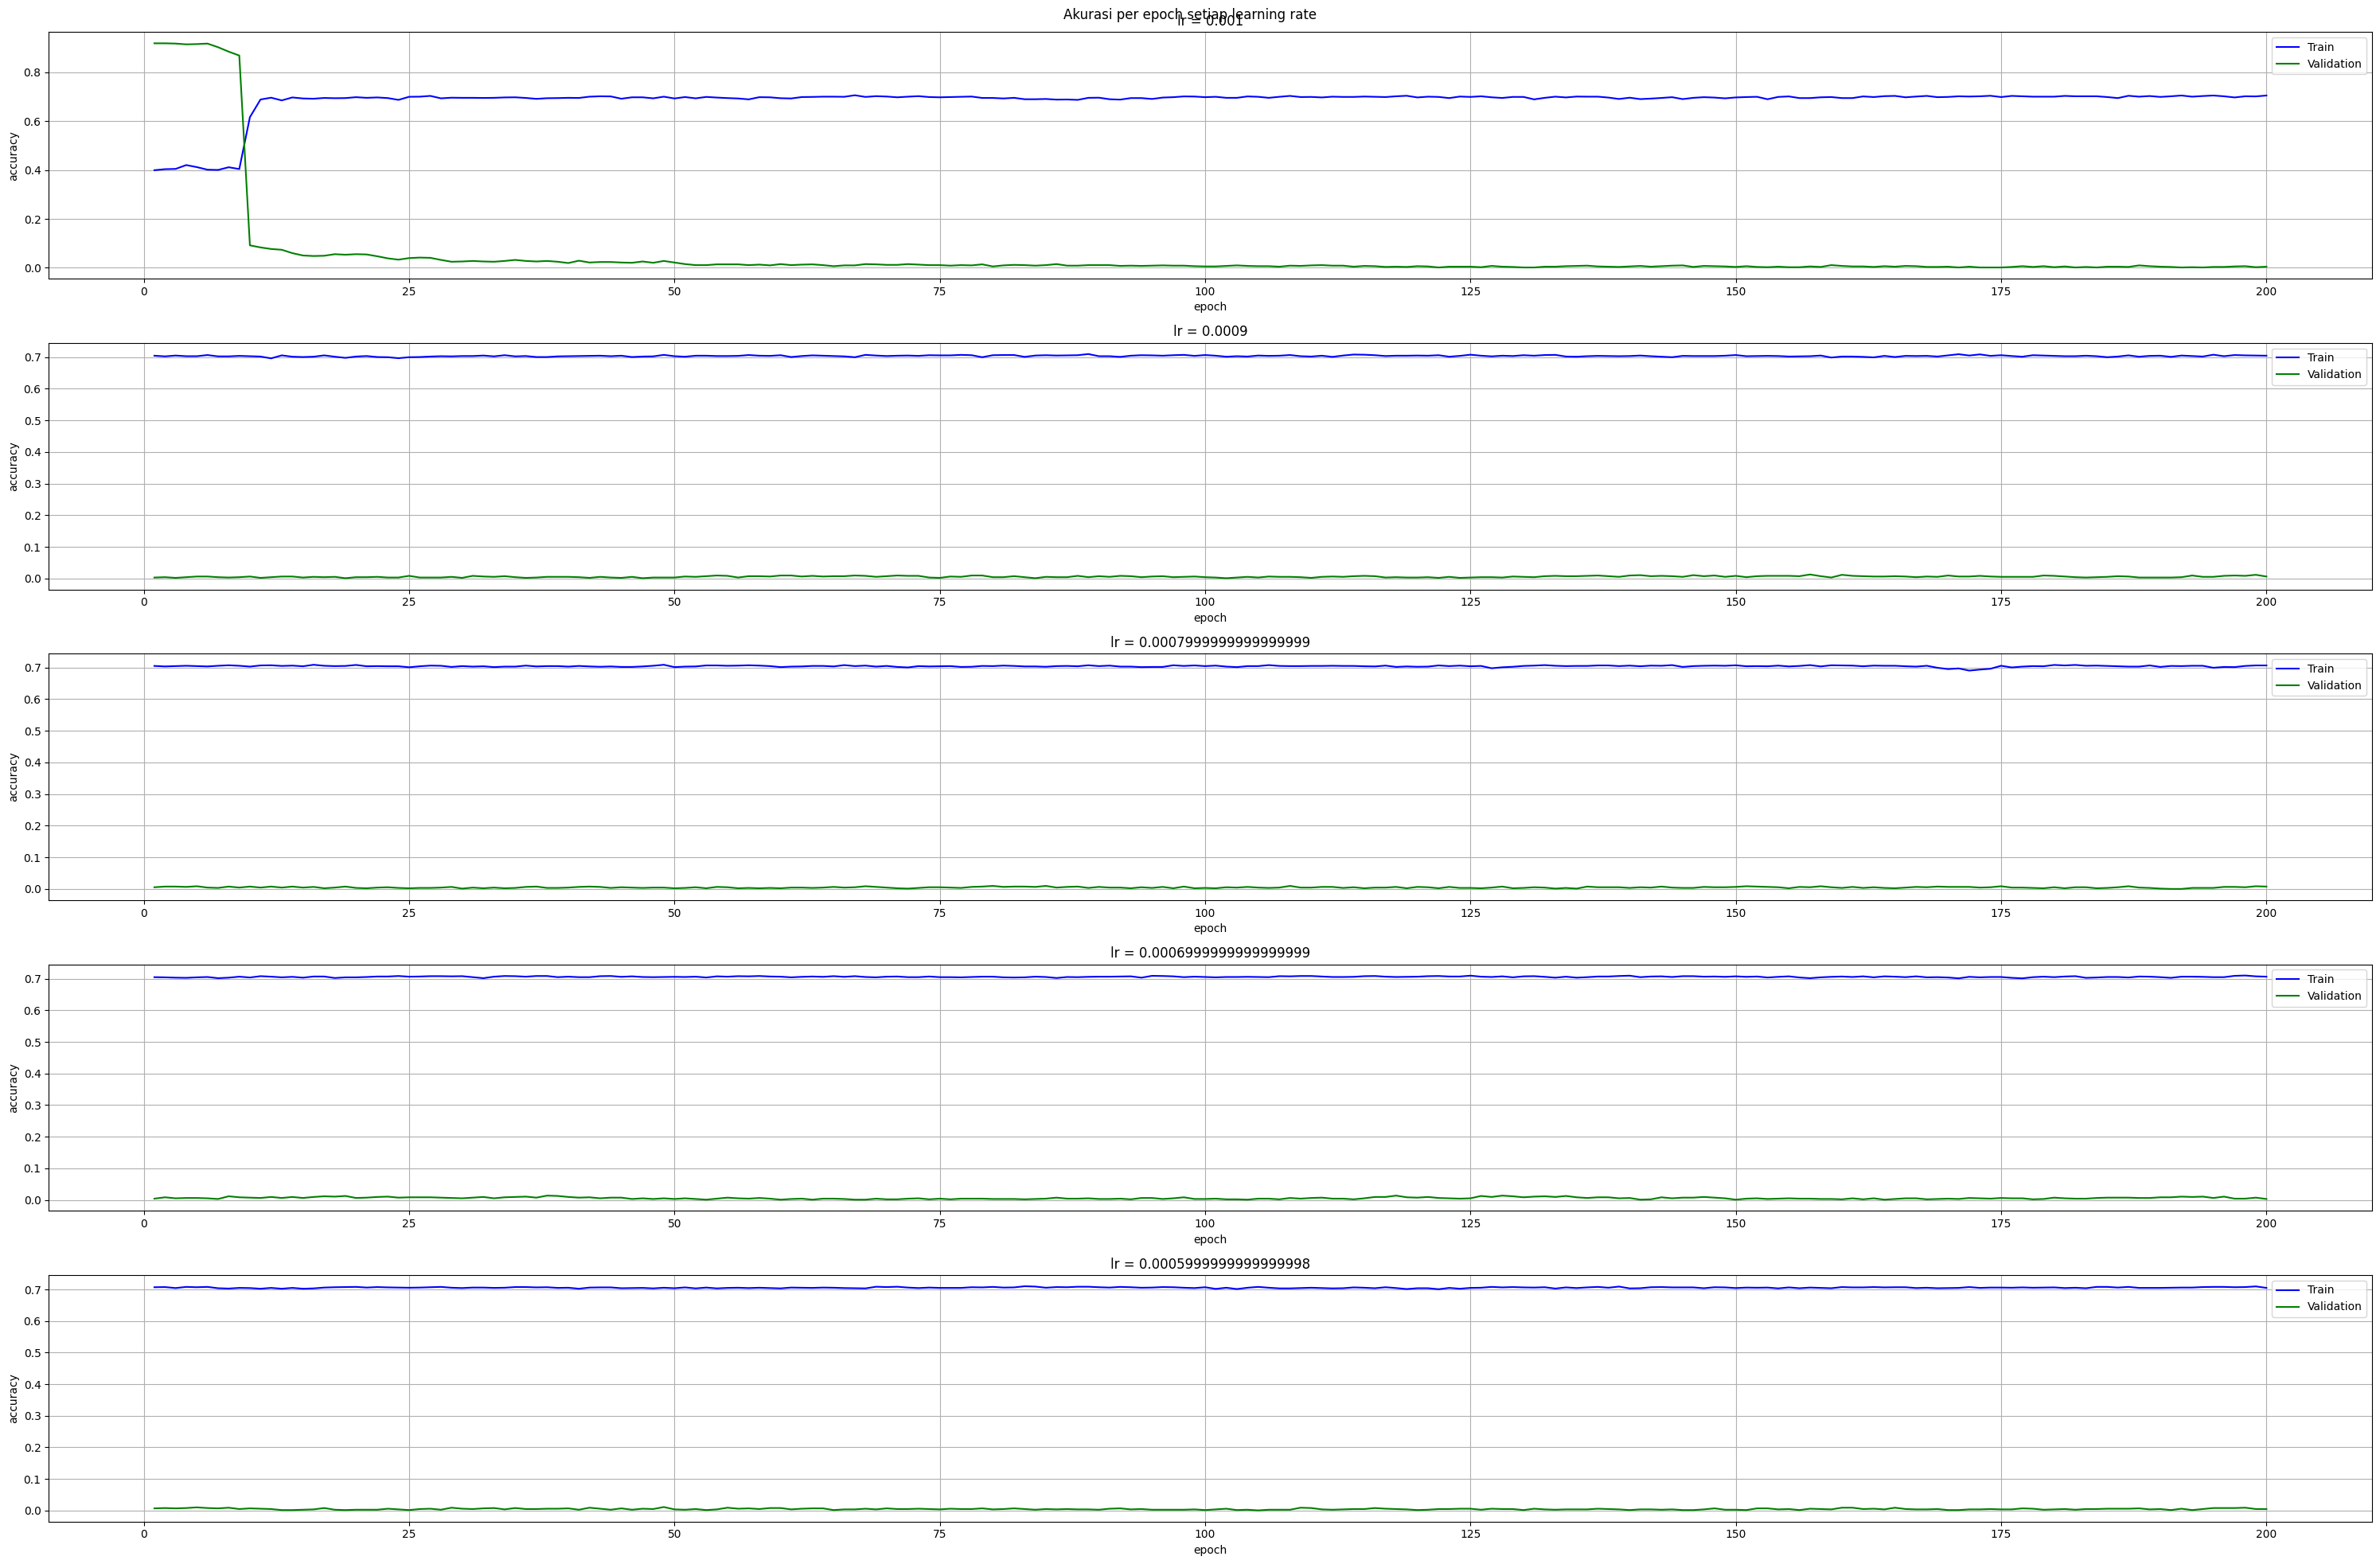

In [28]:
#plot akurasi per epoch
multiplot(histori_akurasi_,"Akurasi per epoch setiap learning rate","accuracy",0.001,-0.0001)

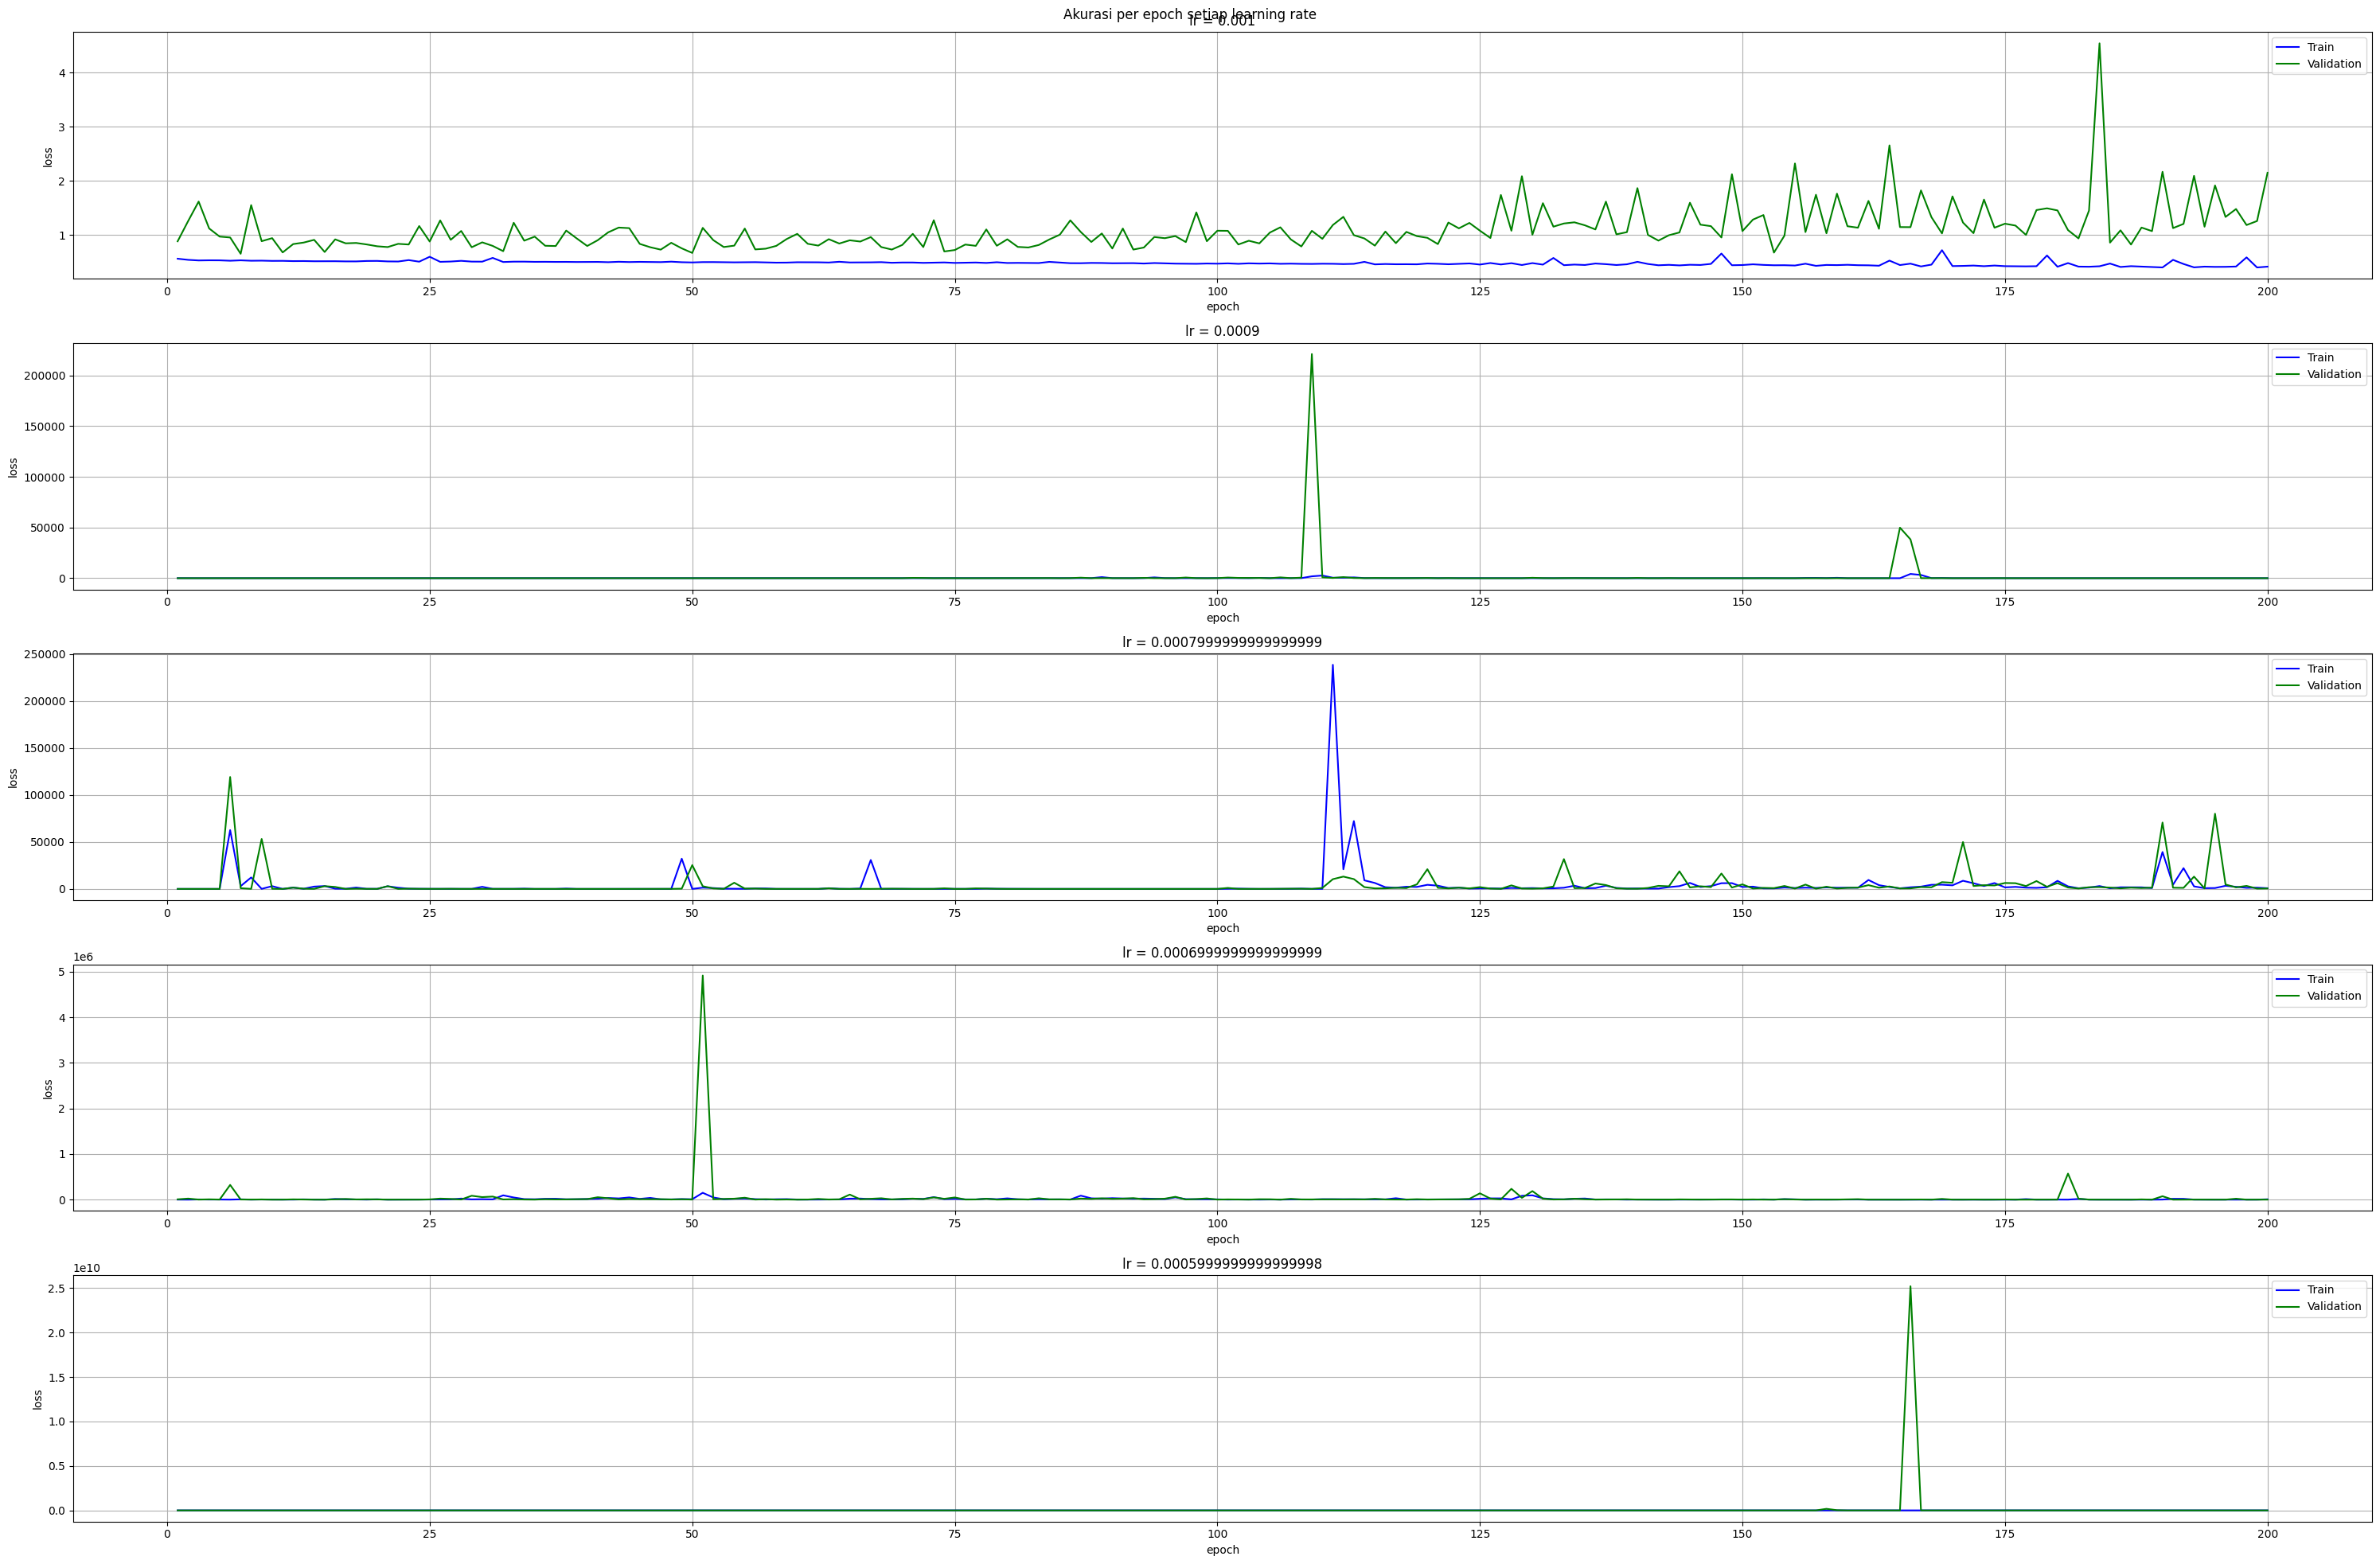

In [29]:
#plot loss per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","loss",0.001,-0.0001)